# MOVIE COLLECTION PREDICTION

## EDA FOR MOVIE COLLECTION

### IGNORE WARNINGS

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

### LIST OF FILES IN THE DIRECTORY

In [2]:
import os
os.listdir()

['README.md',
 'Movie_collection.ipynb',
 '.git',
 'LICENSE',
 'movie_collection.csv',
 '.ipynb_checkpoints']

### IMPORTING REQUIRED LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORTING AND READING THE DATASET

In [4]:
data = pd.read_csv('movie_collection.csv')
pd.set_option('max_columns', None)
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,PG,458,NO
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO


### NUMBER OF ROWS AND COLUMNS IN DATASET

In [5]:
rows, columns = data.shape
print(f'The dataset has {rows} rows and {columns} columns')

The dataset has 506 rows and 19 columns


### BASIC INFO ON THE DATASET

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           506 non-null    int64  
 1   Marketin_expense     506 non-null    float64
 2   Production_expense   506 non-null    float64
 3   Multiplex_coverage   506 non-null    float64
 4   Budget               506 non-null    float64
 5   Movie_length         506 non-null    float64
 6   Lead_ Actor_Rating   506 non-null    float64
 7   Lead_Actress_rating  506 non-null    float64
 8   Director_rating      506 non-null    float64
 9   Producer_rating      506 non-null    float64
 10  Critic_rating        506 non-null    float64
 11  Trailer_views        506 non-null    int64  
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                500 non-null    object 
 15  Avg_age_actors       506 non-null    int

### NUMBER OF FEATURES AND PERCENTAGE OF NULL VALUES

In [7]:
# number of numerical and categorical features
num, obj = 0, 0
for feature in data:
    if data[feature].dtype == 'O':
        obj += 1
    else:
        num += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'The dataset has {num} numerical features and {obj} categorical features')

# Percentage of missing values
print('\nPERCENTAGE MISSING VALUES AFTER FILLING:')
c=0
for feature in data:
    if data[feature].isnull().sum()!=0:
        print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
    else:
        c+=1
if c == len(data.columns):print('There is no missing values in the dataset')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 16 numerical features and 3 categorical features

PERCENTAGE MISSING VALUES AFTER FILLING:
The feature 'Time_taken' has 2.37% missing values
The feature 'Genre' has 1.19% missing values


### REPLACING MISSING VALUES

In [8]:
# Filling the missing quantitative feature with median
data['Time_taken'] = data['Time_taken'].fillna(data['Time_taken'].median())

# Filling the missing qualitative features with the mode
data['Genre'] = data['Genre'].fillna(data['Genre'].mode()[0])
                          
print('\nPERCENTAGE MISSING VALUES AFTER FILLING:')
c=0
for feature in data:
    if data[feature].isnull().sum()!=0:
        print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
    else:
        c+=1
if c == len(data.columns):print('There is no missing values in the dataset')


PERCENTAGE MISSING VALUES AFTER FILLING:
There is no missing values in the dataset


### LOOKING FOR DUPLICATES IN THE DATASET

In [9]:
drows, dcolumns = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if drows==0 else f'There are {drows} duplicates in the dataset.')

There are no duplicates in the dataset.


### NUMBER OF UNIQUE CATEGORICAL FEATURES

In [10]:
for feature in data:
    if data[feature].dtype == 'O':
        if len(data[feature].unique()) == 1:
            print(f'** {feature} has 1 unique value **')
        else:
            print(f'{feature} has {len(data[feature].unique())} unique value')

Genre has 4 unique value
** MPAA_film_rating has 1 unique value **
3D_available has 2 unique value


### NUMBER OF UNIQUE NUMERICAL FEATURES

In [11]:
for feature in data:
    if data[feature].dtype!='O':
        if len(data[feature].unique())==1:
            print(f'** {feature} has {len(data[feature].unique())} unique vaue **')
        else:
            print(f'{feature} has {len(data[feature].unique())} unique vaue')

Collection has 228 unique vaue
Marketin_expense has 504 unique vaue
Production_expense has 76 unique vaue
Multiplex_coverage has 81 unique vaue
Budget has 446 unique vaue
Movie_length has 356 unique vaue
Lead_ Actor_Rating has 339 unique vaue
Lead_Actress_rating has 354 unique vaue
Director_rating has 339 unique vaue
Producer_rating has 353 unique vaue
Critic_rating has 74 unique vaue
Trailer_views has 504 unique vaue
Time_taken has 449 unique vaue
Twitter_hastags has 423 unique vaue
Avg_age_actors has 42 unique vaue
Num_multiplex has 293 unique vaue


In [12]:
# "MPAA_film_rating" has only one unique value. So, it can be removed since it has no contribution to analysis

del data['MPAA_film_rating']

### NUMBER OF COLUMNS AFTER REMOVING 3 FEATURES

In [13]:
rows, columns = data.shape
print(f'The dataset has {columns} columns')

The dataset has 18 columns


### OBSERVATION ON TARGET VARIABLE

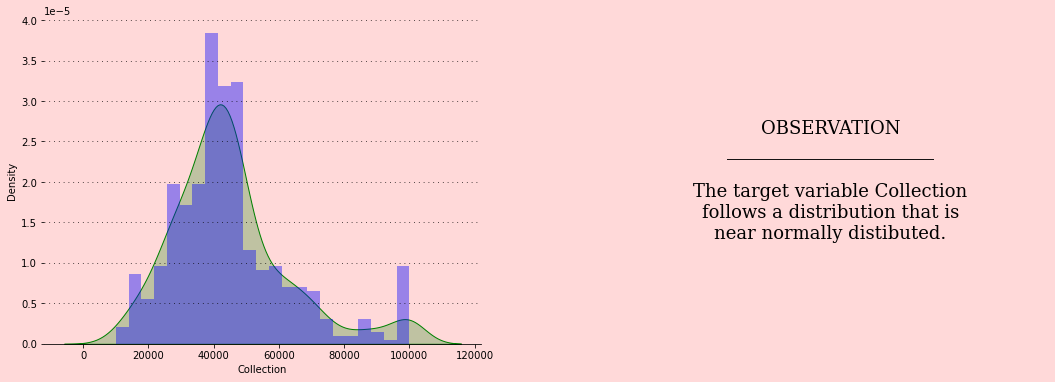

In [14]:
fig = plt.figure(figsize=(18,6))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])

bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)
    
sns.distplot(data['Collection'], color='b', ax= sec_1, hist=True, kde_kws={'fill':'True', 'color':'g'})
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sec_2.text(0.5,0.5,f'OBSERVATION\n_______________________\n\n\
The target variable Collection\nfollows a distribution that is\nnear normally distibuted.',
ha='center',va='center',size=18, family='serif')

sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    for selection in [sec_1, sec_2]:
        if selection == sec_1 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)

### UNIVARIATE ANALYSIS

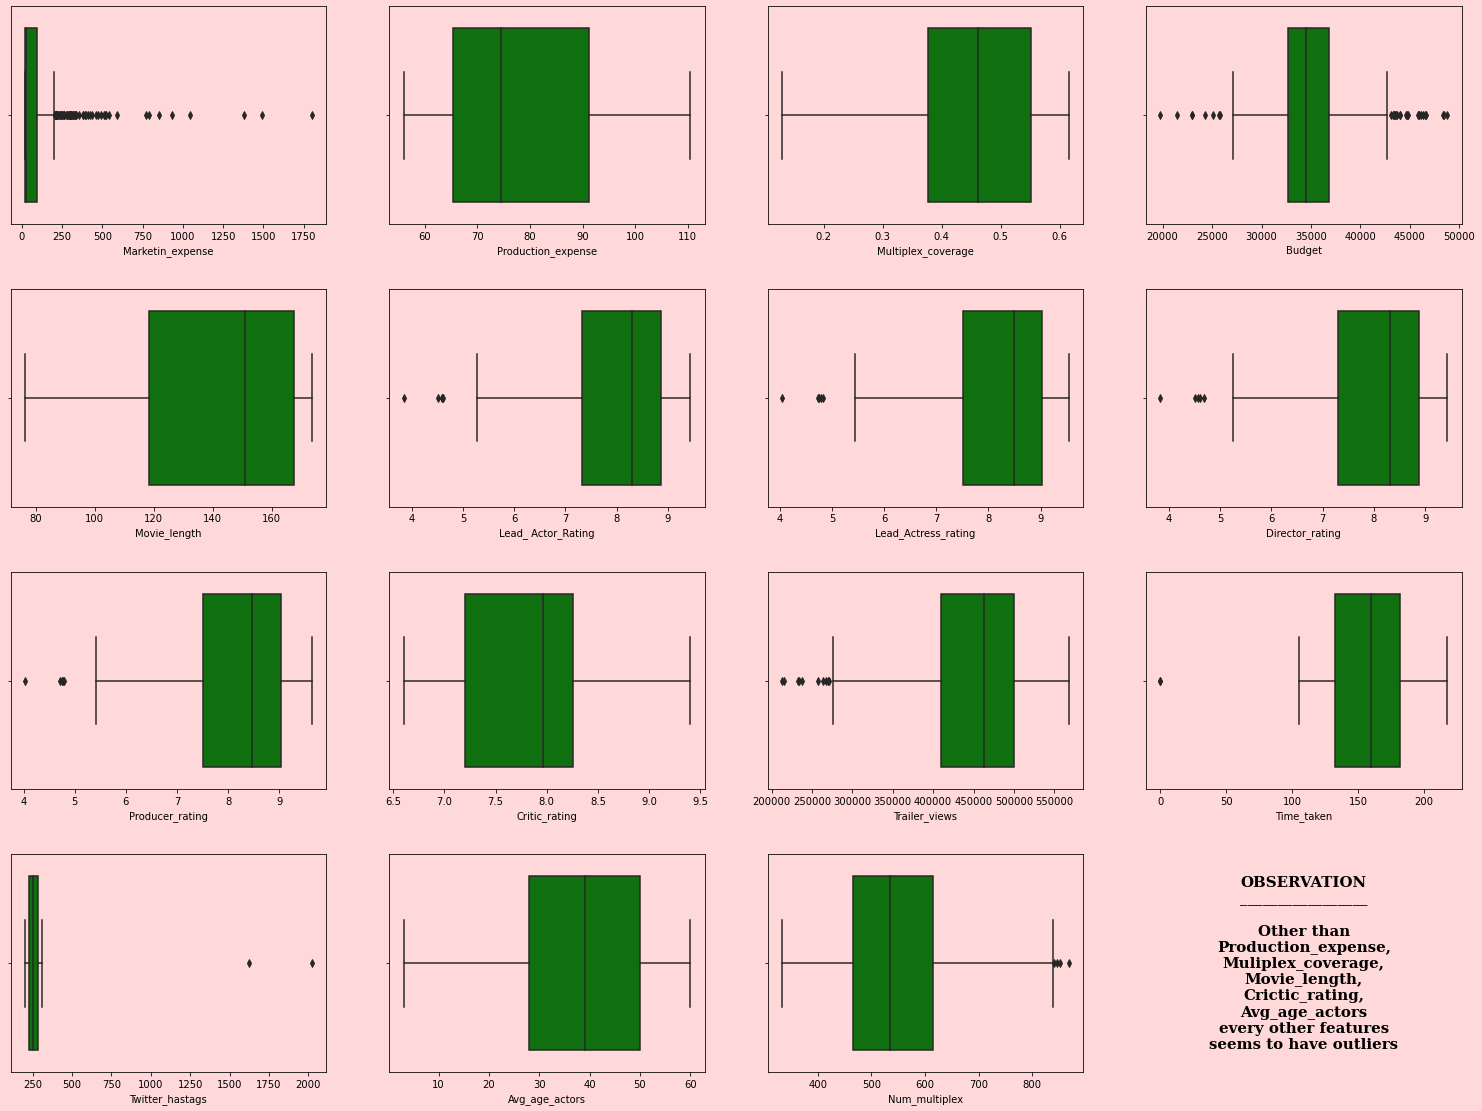

In [15]:
# Creating subplots
fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(6,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11, 
       sec_12, sec_13, sec_14, sec_15]
cnt = 0
for feature in data:
    if data[feature].dtype=='O' or feature=='Collection':
        continue
    else:
        sns.boxplot(x=data[feature], ax=sec[cnt], color='green')
        cnt+=1

# Narating the observations
sec_16.text(0.5,0.5,'OBSERVATION\n_________________\n\n\
Other than\nProduction_expense,\nMuliplex_coverage,\nMovie_length,\nCrictic_rating,\
\nAvg_age_actors\nevery other features\nseems to have outliers',ha='center',va='center', 
size=15, family='serif', weight=600)        
        
# Removing axis and spines
for sec in [sec_16]:
    for location in ['top', 'right', 'bottom','left']:
        sec.spines[location].set_visible(False)
        sec.xaxis.set_visible(False)
        sec.yaxis.set_visible(False)

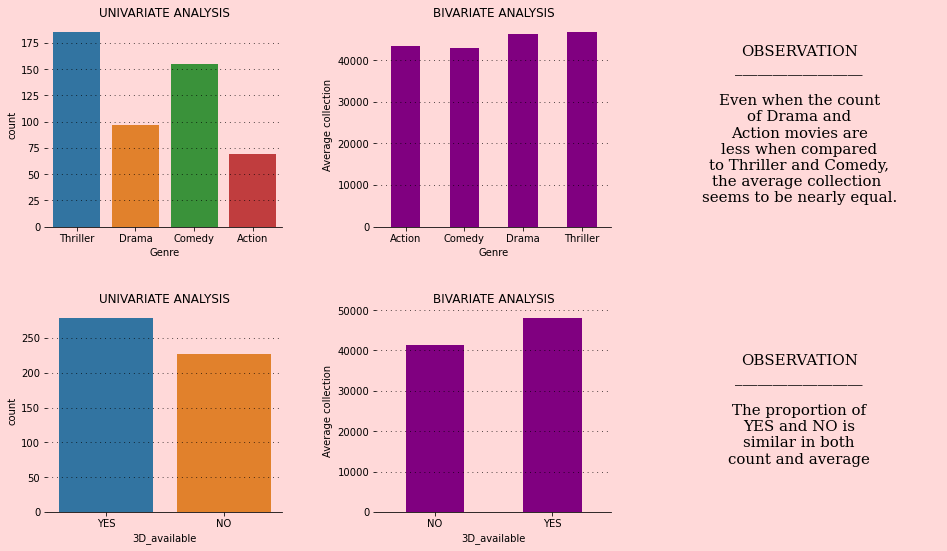

In [16]:
# Creating plot structure
fig = plt.figure(figsize=(16,30))
spec = fig.add_gridspec(6,3)
spec.update(wspace=0.4, hspace=0.4)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[1,0])
sec_05 = fig.add_subplot(spec[1,1])
sec_06 = fig.add_subplot(spec[1,2])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02,sec_04, sec_05]
cnt = 0
for feature in data:
    if data[feature].dtype == 'O':
        sns.countplot(x=feature, data=data, ax=sec[cnt])
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        sec[cnt].set_title('UNIVARIATE ANALYSIS')
        cnt += 1
        data.groupby(feature)['Collection'].mean().plot.bar(color='purple', ax=sec[cnt])
        sec[cnt].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        sec[cnt].set_title('BIVARIATE ANALYSIS')
        sec[cnt].set_ylabel('Average collection')
        sec[cnt].tick_params(labelrotation=0)
        cnt += 1

# Narrating the observations
sec_03.text(0.4,0.5,'OBSERVATION\n_________________\n\n\
Even when the count\nof Drama and\nAction movies are\nless when compared\
\nto Thriller and Comedy,\nthe average collection \nseems to be nearly equal.',ha='center',va='center', 
size=15, family='serif')  

sec_06.text(0.4,0.5,'OBSERVATION\n_________________\n\n\
The proportion of\nYES and NO is\nsimilar in both\ncount and average',ha='center',va='center', 
size=15, family='serif') 
        

# Removing axes and spines
for section in [sec_03, sec_06]:
    for location in ['top', 'right', 'left', 'bottom']:
            section.spines[location].set_visible(False)
            section.xaxis.set_visible(False)
            section.yaxis.set_visible(False)
            
for section in sec:
    for location in ['top', 'right', 'left']:
        if section not in [sec_03, sec_06]:
            section.spines[location].set_visible(False)            

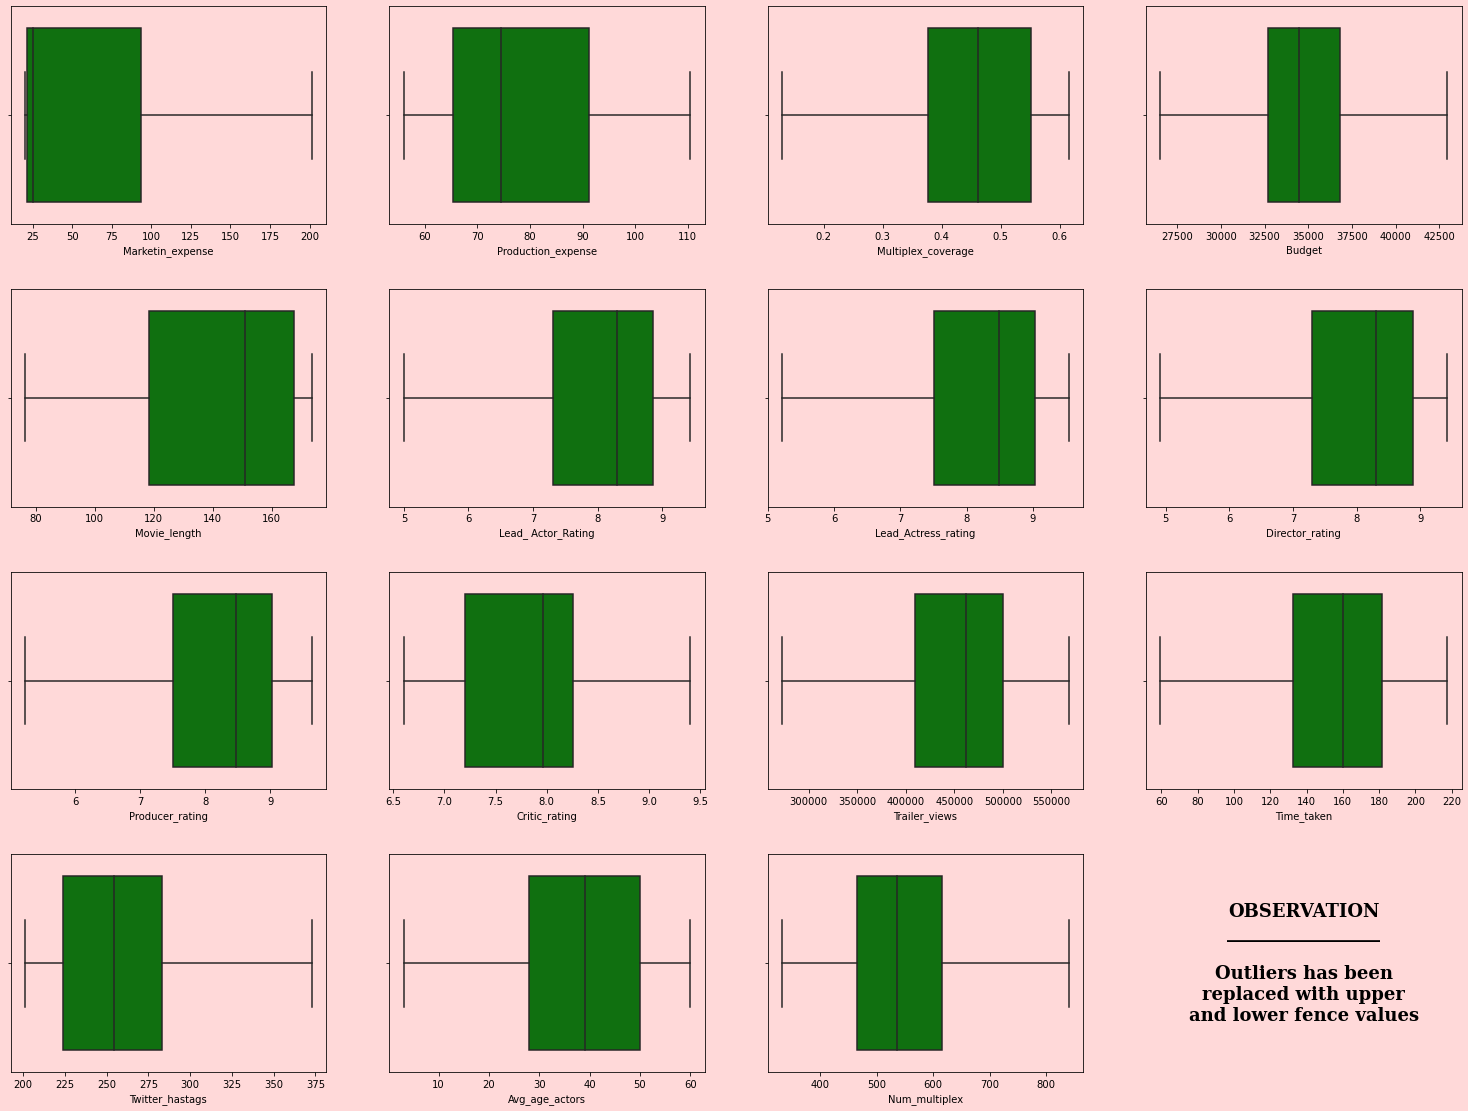

In [17]:
# TREATING OUTLIERS

for feature in data:
    if data[feature].dtype=='O' or feature=='Collection':
        continue
    else:
        lower_quatile = data[feature].quantile(0.25)
        upper_quatile = data[feature].quantile(0.75)
        IQR = upper_quatile-lower_quatile
        lower_fence = lower_quatile-(1.5*IQR)
        upper_fence = upper_quatile+(1.5*IQR)
        
        data[feature] = np.where(data[feature]>upper_fence, upper_fence, data[feature])
        data[feature] = np.where(data[feature]<lower_fence, lower_fence, data[feature])

# Creating subplots
fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(6,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])

# Adding color preference
bg_color = '#ffd9d9'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08,
                  sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11, 
       sec_12, sec_13, sec_14, sec_15]
cnt = 0
for feature in data:
    if data[feature].dtype=='O' or feature=='Collection':
        continue
    else:
        sns.boxplot(x=data[feature], ax=sec[cnt], color='green')
        cnt+=1

# Narating the observations
sec_16.text(0.5,0.5,'OBSERVATION\n_________________\n\n\
Outliers has been\nreplaced with upper\nand lower fence values',ha='center',va='center', 
size=18, family='serif', weight=600)        
        
# Removing axis and spines
for sec in [sec_16]:
    for location in ['top', 'right', 'bottom','left']:
        sec.spines[location].set_visible(False)
        sec.xaxis.set_visible(False)
        sec.yaxis.set_visible(False)

In [18]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367.0,109.60,223.840,23.0,494.0,0,0,1,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055.0,146.64,243.456,42.0,462.0,0,1,0,0
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051.0,147.88,372.846,38.0,458.0,1,0,0,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279.0,185.36,225.344,45.0,472.0,0,1,0,1
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448.0,176.48,225.792,55.0,395.0,0,1,0,0


<AxesSubplot:>

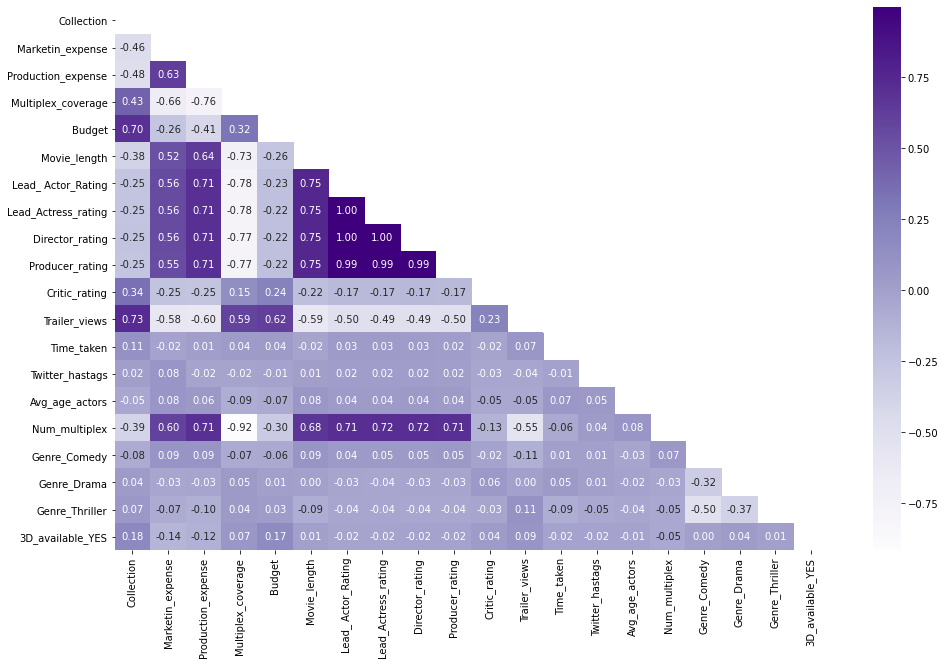

In [19]:
corr = data.corr()
mask = np.triu(corr)
plt.figure(figsize=(16,10))
sns.heatmap(corr, 
            annot=True , 
            fmt='.2f', 
            mask=mask, 
            cmap='Purples')

In [20]:
# del data['Trailer_views']
# del data['Lead_ Actor_Rating']
# del data['Lead_Actress_rating']
# del data['Director_rating']
# del data['Producer_rating']
# del data['Num_multiplex']
# del data['Marketin_expense']

In [21]:
# corr = data.corr()
# mask = np.triu(corr)
# plt.figure(figsize=(16,10))
# sns.heatmap(corr, 
#             annot=True , 
#             fmt='.2f', 
#             mask=mask, 
#             cmap='Purples')

In [22]:
# Creating independent (X) and dependent (Y) dataset
# X = data.drop('Collection',axis=1)
# y = data['Collection']

# # Checking the shape of the dataset
# print(X.shape)
# print(y.shape)

In [23]:
# Checking statistical significance

# import statsmodels.api as sm
# mod = sm.OLS(y,X)
# res = mod.fit()
# print(res.summary())

In [24]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# linreg = LinearRegression()
# model = linreg.fit(X_train,y_train)
# print('R-squared value for training dataset is %.2f' %model.score(X_train,y_train))
# print('R-squared value for testing dataset is %.2f' %model.score(X_test,y_test))

In [25]:
# from scipy import stats
# for feature in data:
#     if data[feature].dtype != 'O':      
#         plt.figure(figsize=(15,5))
#         plt.subplot(1, 2, 1)
#         sns.kdeplot(feature,fill=True,data=data,label=feature, color='red')
#         plt.subplot(1, 2, 2)
#         stats.probplot(data[feature], dist="norm", plot=plt)
#         plt.show()        

In [26]:
# for feature in data:
#     if data[feature].dtype != 'O':
#         data[feature], param = stats.boxcox(data[feature]+1)
#         plt.figure(figsize=(15,5))
#         plt.subplot(1, 2, 1)
#         sns.kdeplot(feature,fill=True,data=data,label=feature, color='red')
#         plt.subplot(1, 2, 2)
#         stats.probplot(data[feature], dist="norm", plot=plt)
#         plt.show()  

In [27]:
# Importing and scaling the data to standard normal distribution
# from sklearn.preprocessing import MinMaxScaler
# scale = MinMaxScaler()
# X_scaled = scale.fit_transform(X)

# # Checking the mean and standard deviation
# mean = np.mean(X_scaled, axis=0)
# std = np.std(X_scaled, axis=0)
# print(f'mean: {int(mean[0]), int(mean[1])}')
# print(f'Standard deviation: {int(std[0]), int(std[1])}')

In [28]:
# x_treated = pd.DataFrame(X_scaled, columns=X.columns)
# x_treated.head()

In [29]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x_treated, y,test_size=0.3, random_state=42)
# linreg = LinearRegression()
# model = linreg.fit(X_train,y_train)
# print('R-squared value for training dataset is %.2f' %model.score(X_train,y_train))
# print('R-squared value for testing dataset is %.2f' %model.score(X_test,y_test))

In [30]:
# from sklearn.linear_model import Lasso
# from sklearn.feature_selection import SelectFromModel
# feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
# feature_sel_model.fit(x_treated, y)
# feature_sel_model.get_support()